In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
df=load_iris()
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
x=df.data

In [4]:
y=df.target


In [5]:
class_name=df.target_names
class_name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [7]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
classifier=Sequential()


In [11]:
from tensorflow.keras.layers import Dense
classifier.add(Dense(units=4,activation='relu'))
classifier.add(Dense(units=10,activation='relu'))
classifier.add(Dense(units=3,activation='softmax'))

In [12]:
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model_hist=classifier.fit(x_train,y_train,validation_split=0.33,epochs=20,batch_size=10)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.1571 - loss: 1.1765 - val_accuracy: 0.3000 - val_loss: 1.1078
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0935 - loss: 1.1469 - val_accuracy: 0.2750 - val_loss: 1.0841
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1010 - loss: 1.1208 - val_accuracy: 0.3000 - val_loss: 1.0624
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2859 - loss: 1.0764 - val_accuracy: 0.4750 - val_loss: 1.0409
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4193 - loss: 1.0563 - val_accuracy: 0.5250 - val_loss: 1.0211
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4539 - loss: 1.0240 - val_accuracy: 0.4500 - val_loss: 1.0010
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4724 - loss: 0.9888 - val_accuracy: 0.5000 - val_loss: 0.9811
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4129 - loss: 0.9637 - val_accuracy: 0.5000 - val_loss: 0.9616
Epoch 

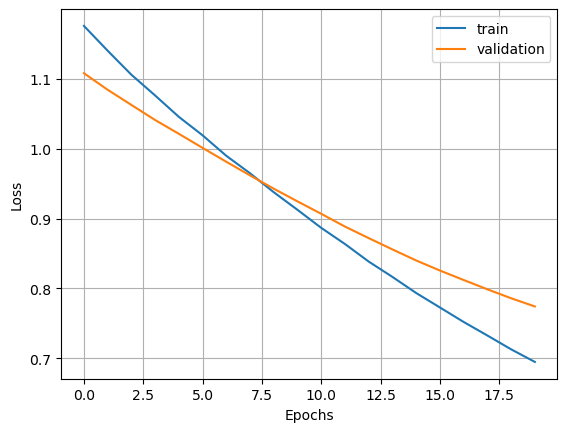

In [14]:
import matplotlib.pyplot as plt
plt.plot(model_hist.history['loss'],label='train')
plt.plot(model_hist.history['val_loss'],label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix
def calcl_accuracy(y_true,y_pred):
  return accuracy_score(y_true,y_pred)

In [16]:
y_pred=classifier.predict(x_test)
y_pred = y_pred.argmax(axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [17]:
calcl_accuracy(y_test,y_pred)

0.7333333333333333

In [18]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[14  0  0]
 [ 0  0  8]
 [ 0  0  8]]


In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression

def lime_explanation(instance, model, num_samples=1000):
    # Step 2: Generate Perturbed Data
    perturbed_data = generate_perturbed_data(instance, num_samples)
    print(len(perturbed_data))
    
    predictions = model.predict(perturbed_data)
    
    print(len(predictions))
    interpretable_model = LinearRegression()
    interpretable_model.fit(perturbed_data, predictions)
    
    feature_importances = interpretable_model.coef_
    
    return feature_importances

def generate_perturbed_data(instance, num_samples):
    
    num_features = len(instance)
    perturbed_data = []
    for _ in range(num_samples):
        perturbation = np.random.normal(0, 0.1, num_features) 
        perturbed_instance = instance + perturbation
        perturbed_data.append(perturbed_instance)
    return np.array(perturbed_data)

instance_to_explain = np.array(x_test[19])  
model = classifier  
explanation = lime_explanation(instance_to_explain, model)
print("Feature importances:", explanation)


1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1000
Feature importances: [[-0.00186376 -0.0005066  -0.00304071 -0.003194  ]
 [-0.00228718 -0.00017502 -0.00159258 -0.00322144]
 [ 0.00415093  0.00068162  0.00463329  0.00641545]]


In [40]:
x_test[19]

array([-0.41600969, -1.28296331,  0.13754657,  0.13250973])

In [41]:
input_features = x_test[5].reshape(1, -1)
output_feature=classifier.predict(input_features)
total=np.sum(np.abs(output_feature))
output_feature_ans=np.argmax(output_feature)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [42]:
print("``````Class importance`````")
class_names = ['setosa', 'versicolor', 'virginica']

i=0
for value in output_feature:
    print(f"{value*100/total}")
    

``````Class importance`````
[16.284649 26.621634 57.093723]


In [43]:
print(output_feature_ans)

2


In [38]:
class_names = ['setosa', 'versicolor', 'virginica'] 
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

predicted_class_index=int(output_feature_ans)



feature_importances = explanation

class_importances = feature_importances[predicted_class_index]

total_importance = np.sum(np.abs(class_importances))
    

print("Explanation for predicted class:", class_names[predicted_class_index])
for feature_name, importance in zip(feature_names, class_importances):
    importance_percentage = (np.abs(importance) / total_importance) * 100
    importance_text = f"{importance_percentage:.2f}%"
    
   
    if importance < 0:
        color = "\033[91m" 
    else:
        color = "\033[92m"  #green text:- means positive going for the class
    
    print(f"{feature_name}: {color}{importance_text}\033[0m")


Explanation for predicted class: virginica
sepal length (cm): 31.66%
sepal width (cm): 1.82%
petal length (cm): 22.31%
petal width (cm): 44.21%
